In [ ]:
using StockFlow
using Catlab
using Catlab.CategoricalAlgebra
using LabelledArrays
using DifferentialEquations
using Plots
using Catlab.Graphics
using Catlab.Programs
using Catlab.WiringDiagrams
using Catlab.Graphics.Graphviz: Html
using Catlab.Graphics.Graphviz

In [ ]:
f_birth(u,p,t)=p.alpha*u
f_death(u,p,t)=-p.beta*u
f_predation(u,p,t)=p.delta*u


# A Lotka Volterra Model dealing with Foxes and Rabbits
LV = StockAndFlow(
    (
        :Fox=>(:death, :predation),
        :Rabbit=>(:birth, :predation),
    ),
(:birth=>:v_birth,:death=>:v_death, :predation=>:v_predation),
(:v_birth=>f_birth,:v_death=>f_death,:v_predation=>f_predation),
(:N=>(:v_birth,:v_death))
)

to_graphviz(LV)

In [ ]:
to_graphviz(N)

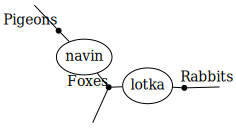

In [61]:
forest_composition_pattern = @relation (Foxes, Pigeons, Rabbits) where (Foxes, Pigeons, Rabbits) begin
    lotka(Foxes, Rabbits)
    navin(Foxes, Pigeons)
end 

to_graphviz(forest_composition_pattern, box_labels = :name, junction_labels = :variable)

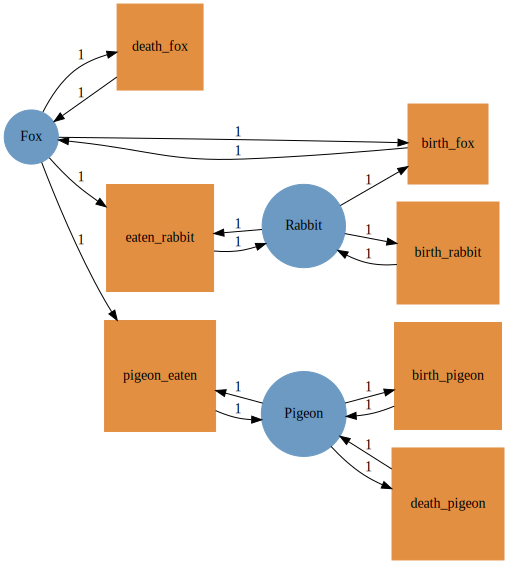

In [69]:
forest_composite = oapply(forest_composition_pattern, 
    Dict(   :lotka => LV,   :navin => N )
) |> apex

to_graphviz(forest_composite)

In [64]:

prey_reproduction_dynamics = ContinuousResourceSharer{Float64}(1, 1, (u, p, t) -> p.alpha * u, [1])
predator_death_dynamics = ContinuousResourceSharer{Float64}(1, 1, (u, p, t) -> -p.gamma * u, [1])
fair_predation_dynamics = ContinuousResourceSharer{Float64}(2, 2, (u, p, t) -> [p.delta * u[1] * u[2], -p.beta * u[1] * u[2]], [1, 2])
unfair_predation_dynamics = ContinuousResourceSharer{Float64}(2, 2, (u, p, t) -> [0, -p.beta * u[1] * u[2]], [1, 2])


ContinuousResourceSharer(ℝ^2 → ℝ^2) with 2 exposed ports

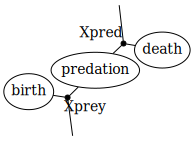

In [65]:
population_dynamics_composition_pattern = @relation (Xpred, Xprey) where (Xpred, Xprey) begin   
    birth(Xprey)   
    predation(Xpred, Xprey)   
    death(Xpred) 
end  

to_graphviz(population_dynamics_composition_pattern,  box_labels = :name, junction_labels = :variable)

In [68]:
oapply(forest_composite, Dict( 
    :birth_rabbit => prey_reproduction_dynamics,
    :death_fox => predator_death_dynamics,
    :birth_fox => fair_predation_dynamics,
    :eaten_rabbit => fair_predation_dynamics,
    :birth_pigeon => prey_reproduction_dynamics,
    :death_pigeon => predator_death_dynamics,
    :pigeon_eaten => unfair_predation_dynamics,
))

MethodError: MethodError: no method matching oapply(::StructuredMulticospan{Catlab.CategoricalAlgebra.StructuredCospans.DiscreteACSet{AnonACSet{TypeLevelBasicSchema{Symbol, Tuple{:S}, Tuple{}, Tuple{:Name}, Tuple{(:sname, :S, :Name)}, Tuple{}}, Tuple{Symbol}, @NamedTuple{S::IntParts, Name::IntParts}, @NamedTuple{sname::ACSets.ColumnImplementations.DenseColumn{Union{AttrVar, Symbol}, Vector{Union{AttrVar, Symbol}}}}, IntParts}, LabelledPetriNet}, Multicospan{LabelledPetriNet, StructTightACSetTransformation{TypeLevelBasicSchema{Symbol, Tuple{:T, :S, :I, :O}, Tuple{(:it, :I, :T), (:is, :I, :S), (:ot, :O, :T), (:os, :O, :S)}, Tuple{:Name}, Tuple{(:tname, :T, :Name), (:sname, :S, :Name)}, Tuple{}}, @NamedTuple{T::Catlab.CategoricalAlgebra.FinSets.FinDomFunctionVector{Int64, Vector{Int64}, Catlab.CategoricalAlgebra.FinSets.FinSetInt}, S::Catlab.CategoricalAlgebra.FinSets.FinDomFunctionVector{Int64, Vector{Int64}, Catlab.CategoricalAlgebra.FinSets.FinSetInt}, I::Catlab.CategoricalAlgebra.FinSets.FinDomFunctionVector{Int64, Vector{Int64}, Catlab.CategoricalAlgebra.FinSets.FinSetInt}, O::Catlab.CategoricalAlgebra.FinSets.FinDomFunctionVector{Int64, Vector{Int64}, Catlab.CategoricalAlgebra.FinSets.FinSetInt}, Name::VarFunction{Symbol}}, LabelledPetriNet, LabelledPetriNet}, Vector{StructTightACSetTransformation{TypeLevelBasicSchema{Symbol, Tuple{:T, :S, :I, :O}, Tuple{(:it, :I, :T), (:is, :I, :S), (:ot, :O, :T), (:os, :O, :S)}, Tuple{:Name}, Tuple{(:tname, :T, :Name), (:sname, :S, :Name)}, Tuple{}}, @NamedTuple{T::Catlab.CategoricalAlgebra.FinSets.FinDomFunctionVector{Int64, Vector{Int64}, Catlab.CategoricalAlgebra.FinSets.FinSetInt}, S::Catlab.CategoricalAlgebra.FinSets.FinDomFunctionVector{Int64, Vector{Int64}, Catlab.CategoricalAlgebra.FinSets.FinSetInt}, I::Catlab.CategoricalAlgebra.FinSets.FinDomFunctionVector{Int64, Vector{Int64}, Catlab.CategoricalAlgebra.FinSets.FinSetInt}, O::Catlab.CategoricalAlgebra.FinSets.FinDomFunctionVector{Int64, Vector{Int64}, Catlab.CategoricalAlgebra.FinSets.FinSetInt}, Name::VarFunction{Symbol}}, LabelledPetriNet, LabelledPetriNet}}}, Vector{Union{Nothing, AnonACSet{TypeLevelBasicSchema{Symbol, Tuple{:S}, Tuple{}, Tuple{:Name}, Tuple{(:sname, :S, :Name)}, Tuple{}}, Tuple{Symbol}, @NamedTuple{S::IntParts, Name::IntParts}, @NamedTuple{sname::ACSets.ColumnImplementations.DenseColumn{Union{AttrVar, Symbol}, Vector{Union{AttrVar, Symbol}}}}, IntParts}}}}, ::Dict{Symbol, ContinuousResourceSharer{Float64, AlgebraicDynamics.UWDDynam.UndirectedInterface{Float64}}})

Closest candidates are:
  oapply(!Matched::AbstractUWD, ::AbstractDict{S, R}) where {S, R<:AbstractResourceSharer}
   @ AlgebraicDynamics ~/.julia/packages/AlgebraicDynamics/YqGCZ/src/uwd_dynam.jl:261
  oapply(!Matched::AbstractUWD, ::AbstractDict, !Matched::Union{Nothing, AbstractDict}; hom_attr, ob_attr, kwargs...)
   @ Catlab ~/.julia/packages/Catlab/5M12F/src/wiring_diagrams/Algebras.jl:18
  oapply(!Matched::AbstractUWD, ::AbstractDict; ...)
   @ Catlab ~/.julia/packages/Catlab/5M12F/src/wiring_diagrams/Algebras.jl:18


In [58]:
params = LVector(alpha = 0.3, beta = 0.4, gamma = 0.2, delta = 0.1)
u0 = [12, 13]
tspan = (0., 10.)
prb = ODEProblem(forest_model, u0, tspan, params)
sol = solve(prb)
plot(sol)

SciMLBase.NoMethodsError: No methods were found for the model function passed to the equation solver.
The function `f` needs to have dispatches, for example, for an ODEProblem
`f` must define either `f(u,p,t)` or `f(du,u,p,t)`. For more information
on how the model function `f` should be defined, consult the docstring for
the appropriate `AbstractSciMLFunction`.

Offending function: f